In [1]:

#!pip install wordcloud
#!pip install nltk

import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import networkx as nx
from collections import Counter
from nltk import ngrams
from collections import defaultdict, Counter
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

(TS=("Blockchain" AND ("Artificial Intelligence" OR "AI" OR "Machine Learning" OR "Deep Learning" 
OR "Neural Networks" OR "Natural Language Processing" OR "Computer Vision" 
OR "Reinforcement Learning" OR "Big Data Analytics" OR "Data Mining" 
OR "Generative AI" OR "Federated Learning" OR "Explainable AI" OR "Edge AI")) 
AND LA=("English") 
AND DT=("Article") 
AND PY=(2016-2024))

4837adet makale

In [2]:
# 1. Dosyanın Okunması
df = pd.read_excel("/kaggle/input/blockyeni/savedrecs.xls")
df = df.applymap(lambda s: s.lower() if type(s) == str else s)
# Tekrar eksik değerleri kontrol et
df.isnull().sum()

<ipython-input-2-ea22909e1c0a>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda s: s.lower() if type(s) == str else s)


Publication Type            0
Authors                     0
Book Authors             4827
Book Editors             4789
Book Group Authors       4837
                         ... 
Highly Cited Status      4837
Hot Paper Status         4837
Date of Export              0
UT (Unique WOS ID)          0
Web of Science Record       0
Length: 72, dtype: int64

In [3]:
print(df.columns)

Index(['Publication Type', 'Authors', 'Book Authors', 'Book Editors',
       'Book Group Authors', 'Author Full Names', 'Book Author Full Names',
       'Group Authors', 'Article Title', 'Source Title', 'Book Series Title',
       'Book Series Subtitle', 'Language', 'Document Type', 'Conference Title',
       'Conference Date', 'Conference Location', 'Conference Sponsor',
       'Conference Host', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses', 'Affiliations', 'Reprint Addresses', 'Email Addresses',
       'Researcher Ids', 'ORCIDs', 'Funding Orgs', 'Funding Name Preferred',
       'Funding Text', 'Cited References', 'Cited Reference Count',
       'Times Cited, WoS Core', 'Times Cited, All Databases',
       '180 Day Usage Count', 'Since 2013 Usage Count', 'Publisher',
       'Publisher City', 'Publisher Address', 'ISSN', 'eISSN', 'ISBN',
       'Journal Abbreviation', 'Journal ISO Abbreviation', 'Publication Date',
       'Publication Year', 'Volume', 'Issue', 'Pa

Authors
zhu, lh          22
wang, x          23
zhang, j         23
xiong, zh        23
wang, h          24
kumar, s         26
li, y            26
sharma, r        26
zheng, zb        27
kang, jw         28
srivastava, g    28
kumar, a         31
park, jh         32
guizani, m       35
wu, j            35
gupta, r         36
kumar, p         36
li, j            37
kumar, r         37
liu, y           40
kumar, n         41
niyato, d        43
yu, fr           43
zhang, y         61
tanwar, s        69
Name: count, dtype: int64


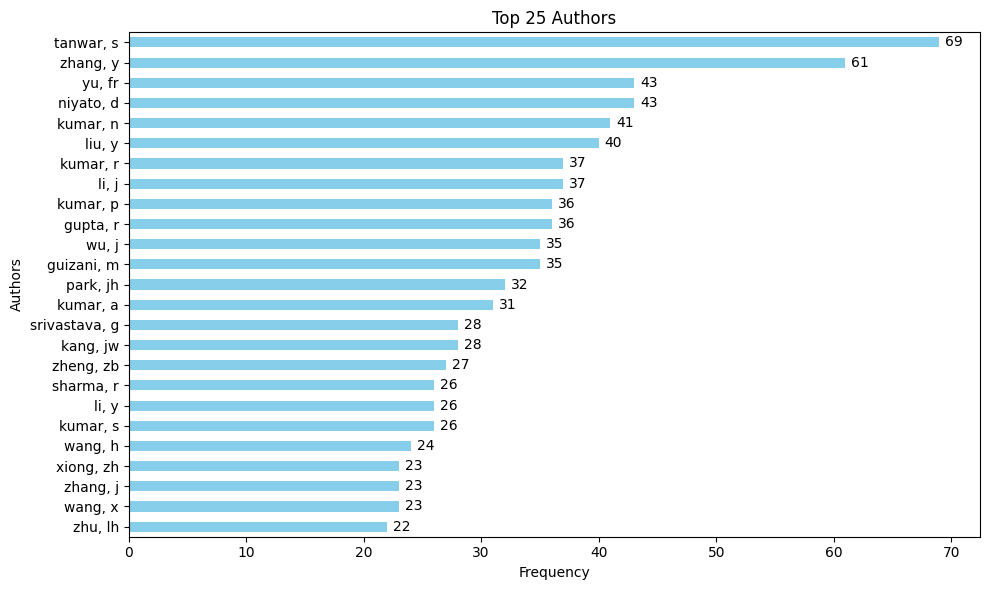

In [4]:
#YAZARLAR
authors = df['Authors'].str.split('; ').explode()

# Yatay çubuk grafiği çizme
plt.figure(figsize=(10, 6))
data = authors.value_counts().head(25).sort_values()
print(data)

# Çubuk grafiği
ax = data.plot(kind='barh', color='skyblue')

# Barların uçlarına değerleri yazma
for index, value in enumerate(data):
    plt.text(value + 0.5, index, str(value), va='center', fontsize=10)

# Başlık ve etiketler
plt.title('Top 25 Authors')
plt.xlabel('Frequency')
plt.ylabel('Authors')
plt.tight_layout()

# Grafiği gösterme
plt.show()



              Authors  Times Cited, WoS Core
12642        zhang, y                   4334
7866        niyato, d                   3086
12300          yu, fr                   2401
6815      maharjan, s                   2356
5276         kang, jw                   1797
10652       tanwar, s                   1784
6603           lu, yl                   1727
12552        zhang, k                   1715
11870       xiong, zh                   1708
7779       nguyen, dc                   1671
2795          ding, m                   1661
8420         pham, qv                   1653
4598        huang, xh                   1604
8274    pathirana, pn                   1600
3910       guizani, m                   1565
5803         kumar, r                   1542
12773       zheng, zb                   1512
9615   seneviratne, a                   1478
8492         poor, hv                   1464
6119            li, j                   1328
4437      hossain, ms                   1313
5800      

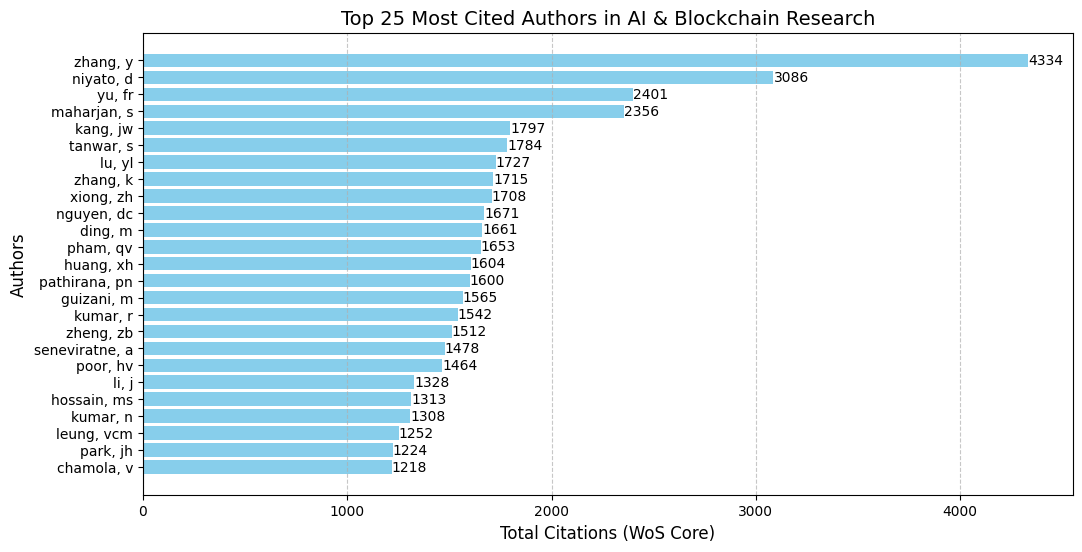

In [5]:
#YAZARLAR VE ATIFLARI
# Authors sütununu '; ' ile ayır ve her yazarı ayrı satırlara genişlet
authors = df[['Authors', 'Times Cited, WoS Core']].dropna()
authors = authors.assign(Authors=authors['Authors'].str.split('; ')).explode('Authors')

# Yazar bazında toplam atıf sayısını hesapla
author_citations = authors.groupby('Authors')['Times Cited, WoS Core'].sum().reset_index()

# En çok atıf alan 25 yazarı sırala
top_cited_authors = author_citations.sort_values(by="Times Cited, WoS Core", ascending=False).head(25)

# Sonuçları görüntüleme
print(top_cited_authors)

# Authors sütununu '; ' ile ayır ve her yazarı ayrı satırlara genişlet
authors = df[['Authors', 'Times Cited, WoS Core']].dropna()
authors = authors.assign(Authors=authors['Authors'].str.split('; ')).explode('Authors')

# Yazar bazında toplam atıf sayısını hesapla
author_citations = authors.groupby('Authors')['Times Cited, WoS Core'].sum().reset_index()

# En çok atıf alan 25 yazarı sırala
top_cited_authors = author_citations.sort_values(by="Times Cited, WoS Core", ascending=False).head(25)



# Grafik Çizimi
plt.figure(figsize=(12, 6))
bars = plt.barh(top_cited_authors['Authors'], top_cited_authors['Times Cited, WoS Core'], color='skyblue')
plt.xlabel("Total Citations (WoS Core)", fontsize=12)
plt.ylabel("Authors", fontsize=12)
plt.title("Top 25 Most Cited Authors in AI & Blockchain Research", fontsize=14)
plt.gca().invert_yaxis()  # En çok atıf alanın en üstte görünmesini sağlar
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Çubukların uçlarına atıf sayısını ekleme
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{int(bar.get_width())}', ha='left', va='center', fontsize=10)

# Grafiği göster
plt.show()
top_cited_authors.to_csv('top_cited_authors.csv',index=False)

Affiliations
university of technology sydney                                  54
ministry of education & science of ukraine                       55
huazhong university of science & technology                      55
prince sattam bin abdulaziz university                           56
shanghai jiao tong university                                    58
birla institute of technology & science pilani (bits pilani)     58
hong kong polytechnic university                                 58
shenzhen university                                              59
university of petroleum & energy studies (upes)                  61
deakin university                                                62
beijing institute of technology                                  65
sun yat sen university                                           68
indian institute of technology system (iit system)               70
guangdong university of technology                               77
nirma university                   

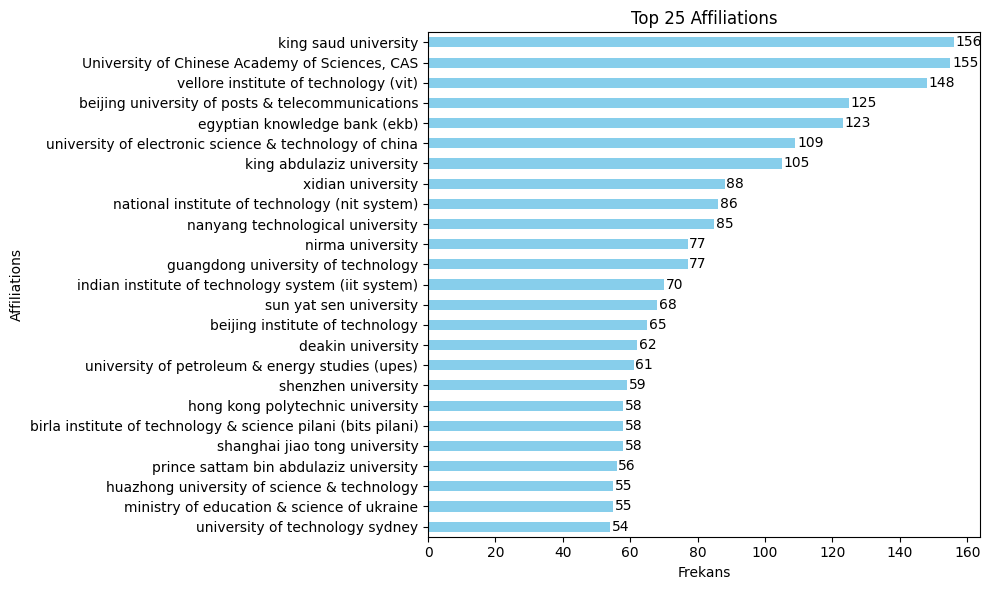

In [6]:
# Affiliation temizleme
affiliations = df['Affiliations'].dropna().str.split('; ').explode()
affiliations = affiliations.str.strip().str.lower()  # Boşlukları ve küçük harfleri normalize et

# Mapping tablosu
mapping = {
    "vit vellore": "vellore institute of technology (vit)",
    "chinese academy of sciences, cas": "University of Chinese Academy of Sciences, CAS",
    "chinese academy of sciences": "University of Chinese Academy of Sciences, CAS",
  "University of Chinese Academy of Sciences, CAS" : "University of Chinese Academy of Sciences, CAS"  
 }

# Mapping'i uygula
affiliations = affiliations.replace(mapping)

# Yatay çubuk grafiği çizme
plt.figure(figsize=(10, 6))
data = affiliations.value_counts().head(25).sort_values()
print(data)
# Çubuk grafiği
ax = data.plot(kind='barh', color='skyblue')

# Barların uçlarına değer yazma
for index, value in enumerate(data):
    plt.text(value + 0.5, index, str(value), va='center', fontsize=10)

# Başlık ve etiketler
plt.title('Top 25 Affiliations')
plt.xlabel('Frekans')
plt.ylabel('Affiliations')
plt.tight_layout()

# Grafiği gösterme
plt.show()
affiliations.to_csv('top_25_affi.csv',index=False)

                                           Affiliations  Times Cited, WoS Core
2298  university of electronic science & technology ...                   5644
1345                   nanyang technological university                   4938
195    beijing university of posts & telecommunications                   4609
2266     university of chinese academy of sciences, cas                   4103
1097                               king saud university                   4097
2468                                 university of oslo                   3936
439                                   deakin university                   3884
2652              vellore institute of technology (vit)                   3676
648                  guangdong university of technology                   3168
1857                             sun yat sen university                   3104
2230                                 university of bonn                   2981
2444               university of new south wales syd

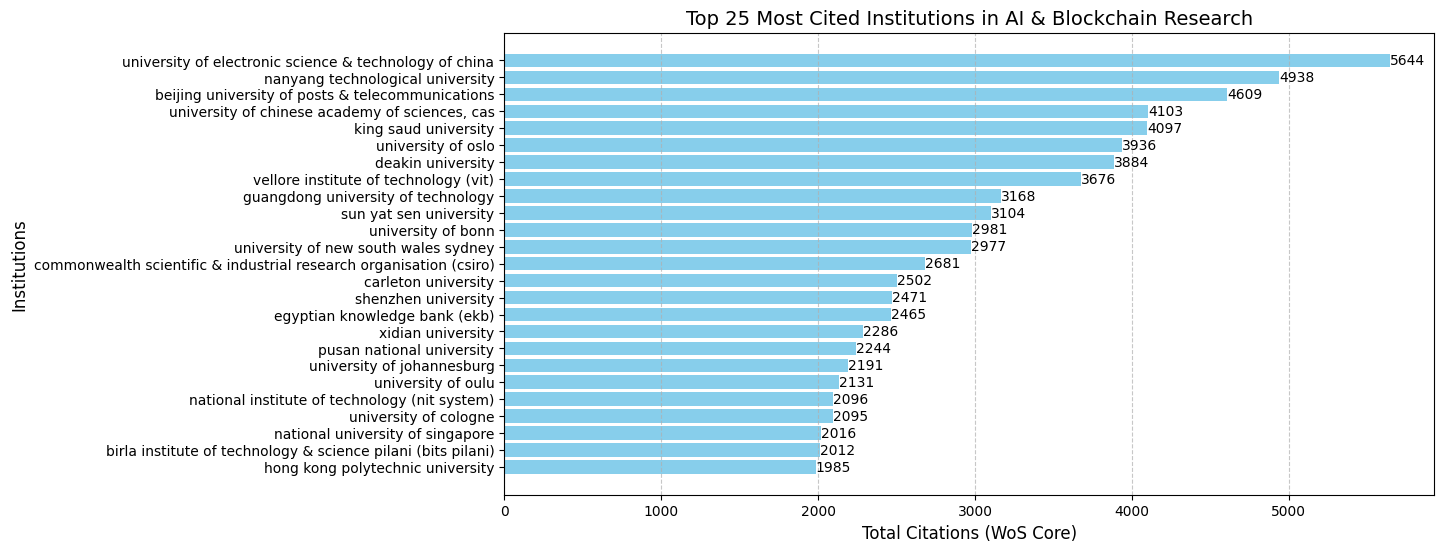

In [7]:

# Affiliations sütununu temizleme ve normalize etme
affiliations = df[['Affiliations', 'Times Cited, WoS Core']].dropna()
affiliations = affiliations.assign(Affiliations=affiliations['Affiliations'].str.split('; ')).explode('Affiliations')
affiliations['Affiliations'] = affiliations['Affiliations'].str.strip().str.lower()  # Küçük harfe çevir ve boşlukları temizle

# Mapping tablosu
mapping = {
    "vit vellore": "vellore institute of technology (vit)",
    "chinese academy of sciences, cas": "university of chinese academy of sciences, cas",
    "chinese academy of sciences": "university of chinese academy of sciences, cas",
    "university of chinese academy of sciences, cas": "university of chinese academy of sciences, cas"
}

# Mapping'i uygula
affiliations['Affiliations'] = affiliations['Affiliations'].replace(mapping)

# Kurum bazında toplam atıf sayısını hesapla
affiliation_citations = affiliations.groupby('Affiliations')['Times Cited, WoS Core'].sum().reset_index()

# En çok atıf alan 25 kurumu sırala
top_cited_affiliations = affiliation_citations.sort_values(by="Times Cited, WoS Core", ascending=False).head(25)

# Sonuçları görüntüleme
print(top_cited_affiliations)

# Grafik Çizimi
plt.figure(figsize=(12, 6))
bars = plt.barh(top_cited_affiliations['Affiliations'], top_cited_affiliations['Times Cited, WoS Core'], color='skyblue')
plt.xlabel("Total Citations (WoS Core)", fontsize=12)
plt.ylabel("Institutions", fontsize=12)
plt.title("Top 25 Most Cited Institutions in AI & Blockchain Research", fontsize=14)
plt.gca().invert_yaxis()  # En çok atıf alan kurumun en üstte görünmesini sağlar
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Çubukların uçlarına atıf sayısını ekleme
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{int(bar.get_width())}', ha='left', va='center', fontsize=10)

# Grafiği göster
plt.show()


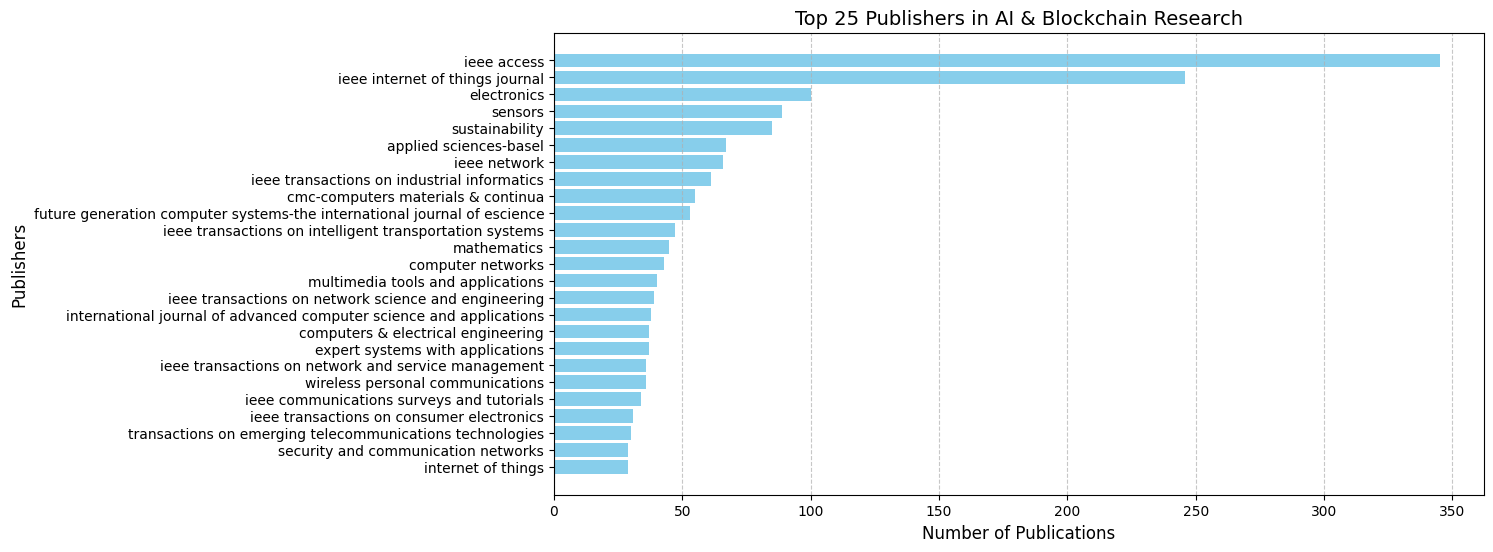

In [8]:

# Publisher isimlerini temizleme ve standardize etme
publisher_map = {
    "ieee-inst electrical electronics engineers inc": "ieee",
    "institute of electrical and electronics engineers inc.": "ieee",
    "multidisciplinary digital publishing institute (mdpi)": "mdpi",
    "elsevier ltd": "elsevier",
    "elsevier b.v.": "elsevier",
    "bmc": "biomed",
    "biomed central ltd": "biomed",
    "elsevier inc.": "elsevier",
    "springer science and business media deutschland gmbh": "springer",
    "frontiers media s.a.": "frontiers media sa",
    "john wiley and sons inc": "wiley",
    "oxford univ press": "oxford university press",
    "sage publications inc.": "sage publications ltd",
    "sage publications inc": "sage publications ltd",
    "jmir publications, inc": "jmir publications inc.",
    "peerj inc": "peerj inc.",
    "ios press": "ios press bv",
    "ieee computer soc": "ieee",
    "john wiley and sons ltd": "wiley",
    "biomed central ltd.": "biomed",
    "mdpi ag": "mdpi",
    "lippincott williams and wilkins": "lippincott williams & wilkins",
    "taylor & francis ltd": "taylor and francis ltd.",
    "ieee computer society": "ieee",
    "wiley-v c h verlag gmbh": "wiley",
    "wiley periodicals, inc": "wiley",
    "elsevier ireland ltd": "elsevier",
    "elsevier sci ltd": "elsevier",
    "springer heidelberg": "springer",
    "springer nature": "springer",
    "wiley-hindawi": "wiley",
    "taylor & francis inc": "taylor and francis ltd."
}

# Publisher sütunundaki tüm isimleri değiştirme
df['Source Title'] = df['Source Title'].replace(publisher_map)

# İçinde belirli yayıncı isimleri geçen tüm verileri standardize etme
df['Source Title'] = df['Source Title'].apply(lambda x: 'elsevier' if isinstance(x, str) and 'elsevier' in x.lower() else x)
df['Source Title'] = df['Source Title'].apply(lambda x: 'springer' if isinstance(x, str) and 'springer' in x.lower() else x)

# Yayıncı bazında makale sayısını hesaplama
publisher_counts = df['Source Title'].value_counts().head(25)

# Grafik Çizimi
plt.figure(figsize=(12, 6))
plt.barh(publisher_counts.index, publisher_counts.values, color='skyblue')
plt.xlabel("Number of Publications", fontsize=12)
plt.ylabel("Publishers", fontsize=12)
plt.title("Top 25 Publishers in AI & Blockchain Research", fontsize=14)
plt.gca().invert_yaxis()  # En çok makale yayımlayan yayıncının en üstte görünmesini sağlar
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


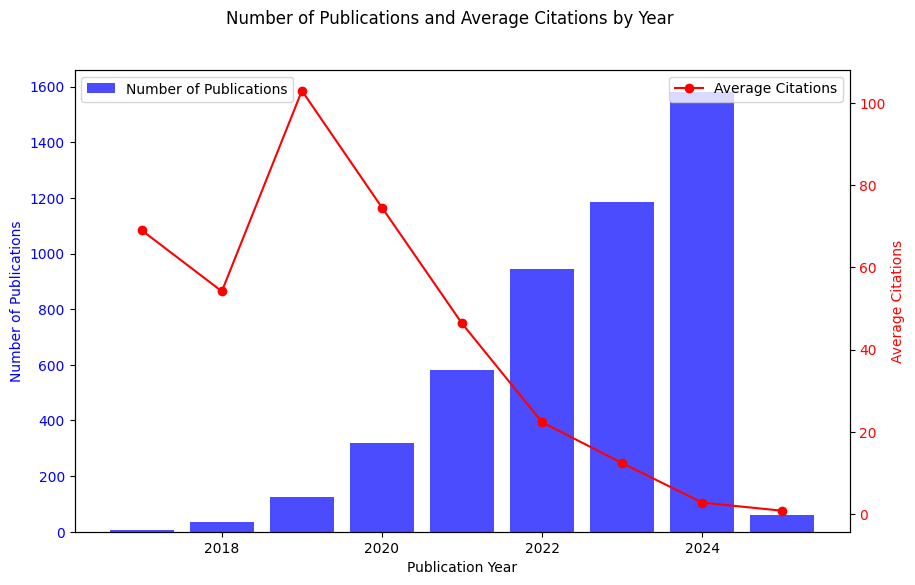

In [9]:
# Yıl bazında toplam yayın sayısı ve ortalama atıf sayısını hesaplama
publication_count = df.groupby("Publication Year").size()  # Yayın sayısı
average_citations = df.groupby("Publication Year")["Times Cited, All Databases"].mean()  # Ortalama atıf

# Grafik çizimi
fig, ax1 = plt.subplots(figsize=(10, 6))

# Yayın sayısını çubuk grafik olarak çiz
ax1.bar(publication_count.index, publication_count.values, color="blue", alpha=0.7, label="Number of Publications")
ax1.set_xlabel("Publication Year")
ax1.set_ylabel("Number of Publications", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Ortalama atıf sayısını çizgi grafik olarak çiz
ax2 = ax1.twinx()
ax2.plot(average_citations.index, average_citations.values, color="red", marker="o", label="Average Citations")
ax2.set_ylabel("Average Citations", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Başlık ve lejant ekleme
fig.suptitle("Number of Publications and Average Citations by Year")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Grafiği göster
plt.show()

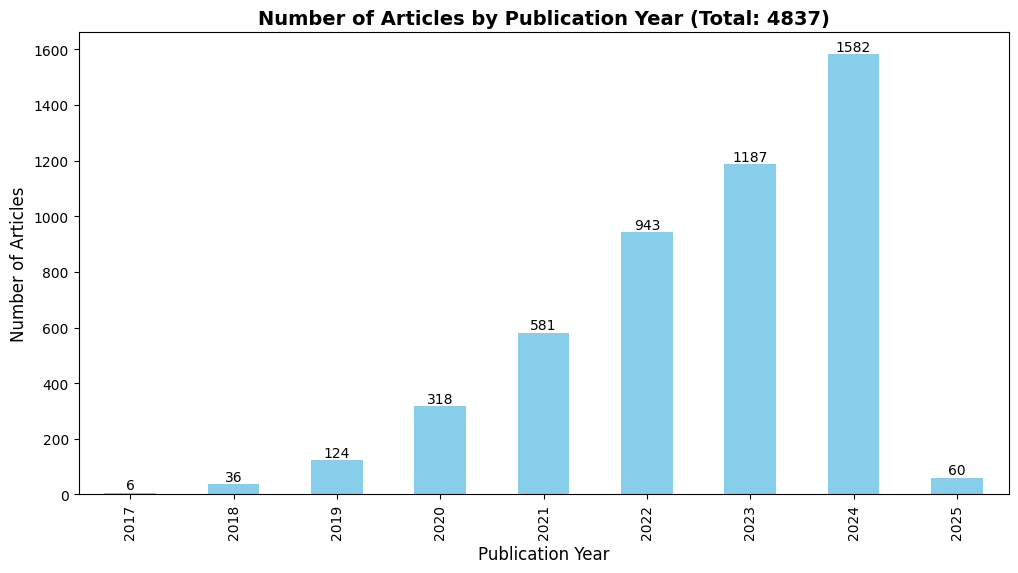

In [10]:
# Toplam makale sayısını hesapla
yearly_publications = df['Publication Year'].value_counts().sort_index()

total_articles = yearly_publications.sum()

# Görselleştirme
plt.figure(figsize=(12, 6))
bars = yearly_publications.plot(kind='bar', color='skyblue')
plt.xlabel("Publication Year", fontsize=12)
plt.ylabel("Number of Articles", fontsize=12)
plt.title(f"Number of Articles by Publication Year (Total: {total_articles})", fontsize=14, fontweight='bold')

# Çubukların uçlarına değerleri ekleme
for i, value in enumerate(yearly_publications):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.show()


                                          Article Title  Times Cited, WoS Core
4256  building dynamic capabilities for digital tran...                   1169
1670  the impact of digital technology and industry ...                    919
1219  digital twin: enabling technologies, challenge...                    817
869   6g wireless communication systems: application...                    790
1767        the road towards 6g: a comprehensive survey                    714
2572  industry 5.0: a survey on enabling technologie...                    706
2513  blockchain and federated learning for privacy-...                    694
1494  a survey on iot security: application areas, s...                    641
1871  incentive mechanism for reliable federated lea...                    534
2921  federated learning for internet of things: a c...                    532
1066  impact of covid-19 pandemic on information man...                    504
246   on big data, artificial intelligence and smart

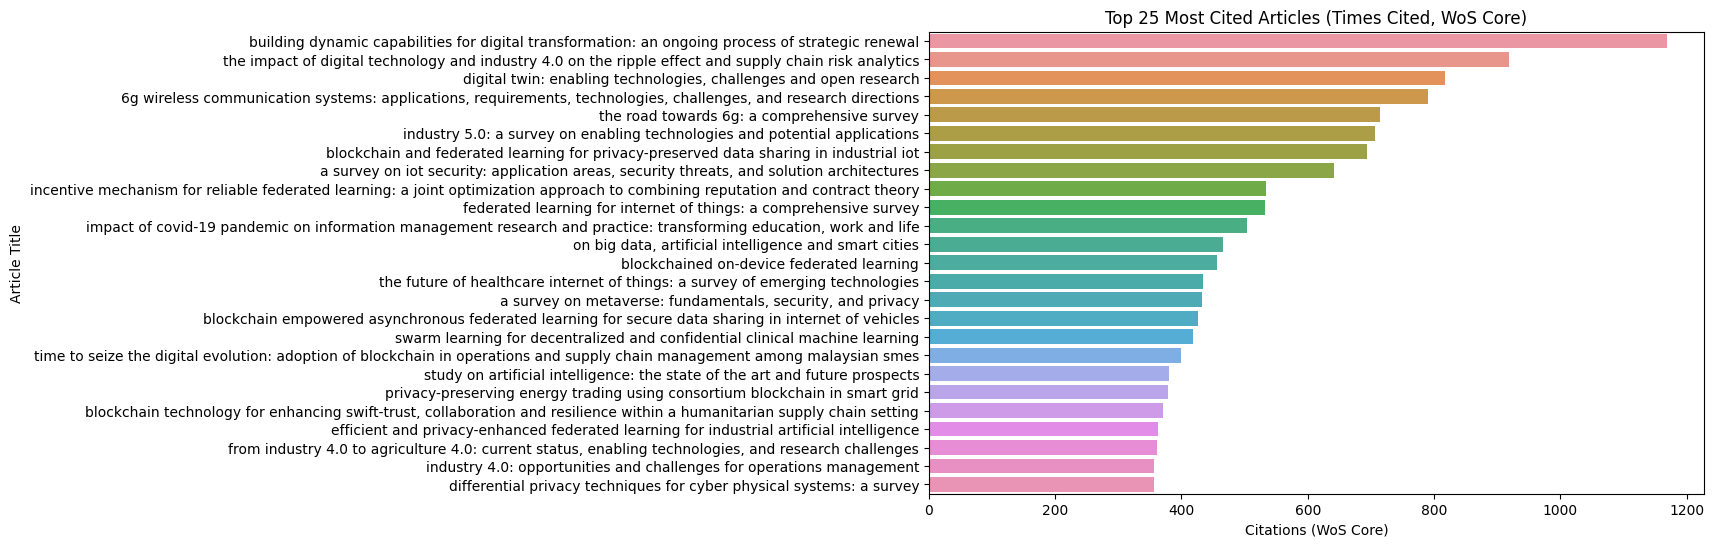

In [11]:
# En çok alıntı alan ilk 25 makale
top_cited = df.nlargest(25, 'Times Cited, WoS Core')[['Article Title', 'Times Cited, WoS Core']]
print(top_cited)

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(data=top_cited, y='Article Title', x='Times Cited, WoS Core', orient='h')
plt.xlabel("Citations (WoS Core)")
plt.ylabel("Article Title")
plt.title("Top 25 Most Cited Articles (Times Cited, WoS Core)")
plt.show()

                                          Article Title  \
4256  building dynamic capabilities for digital tran...   
1670  the impact of digital technology and industry ...   
1219  digital twin: enabling technologies, challenge...   
869   6g wireless communication systems: application...   
1767        the road towards 6g: a comprehensive survey   
2572  industry 5.0: a survey on enabling technologie...   
2513  blockchain and federated learning for privacy-...   
1494  a survey on iot security: application areas, s...   
1871  incentive mechanism for reliable federated lea...   
2921  federated learning for internet of things: a c...   
1066  impact of covid-19 pandemic on information man...   
246   on big data, artificial intelligence and smart...   
1985          blockchained on-device federated learning   
3182  the future of healthcare internet of things: a...   
4233  a survey on metaverse: fundamentals, security,...   
2514  blockchain empowered asynchronous federated le... 

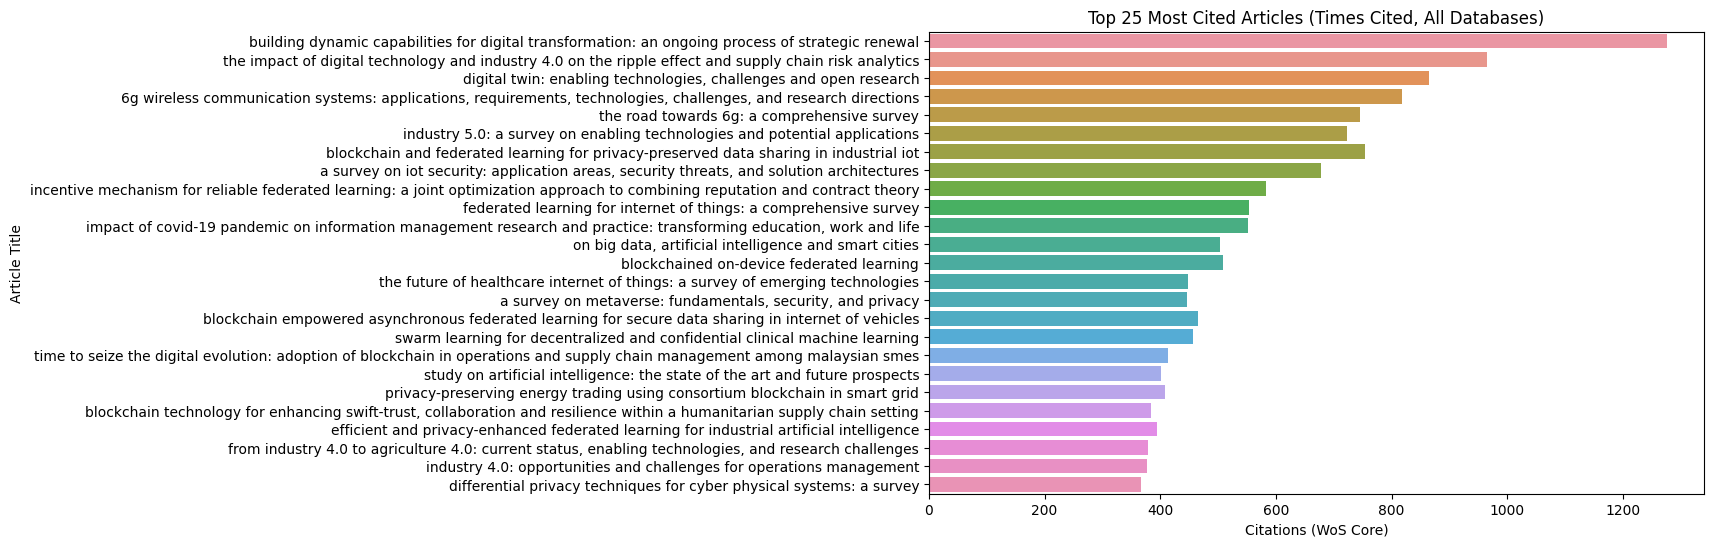

In [12]:
# En çok alıntı alan ilk 25 makale
top_cited = df.nlargest(25, 'Times Cited, WoS Core')[['Article Title', 'Times Cited, All Databases']]
print(top_cited)

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(data=top_cited, y='Article Title', x='Times Cited, All Databases', orient='h')
plt.xlabel("Citations (WoS Core)")
plt.ylabel("Article Title")
plt.title("Top 25 Most Cited Articles (Times Cited, All Databases)")
plt.show()

                                          Article Title  Cited Reference Count
4256  building dynamic capabilities for digital tran...                    135
1670  the impact of digital technology and industry ...                    104
1219  digital twin: enabling technologies, challenge...                     96
869   6g wireless communication systems: application...                     89
1767        the road towards 6g: a comprehensive survey                    171
2572  industry 5.0: a survey on enabling technologie...                    181
2513  blockchain and federated learning for privacy-...                     29
1494  a survey on iot security: application areas, s...                    184
1871  incentive mechanism for reliable federated lea...                     36
2921  federated learning for internet of things: a c...                    209
1066  impact of covid-19 pandemic on information man...                     92
246   on big data, artificial intelligence and smart

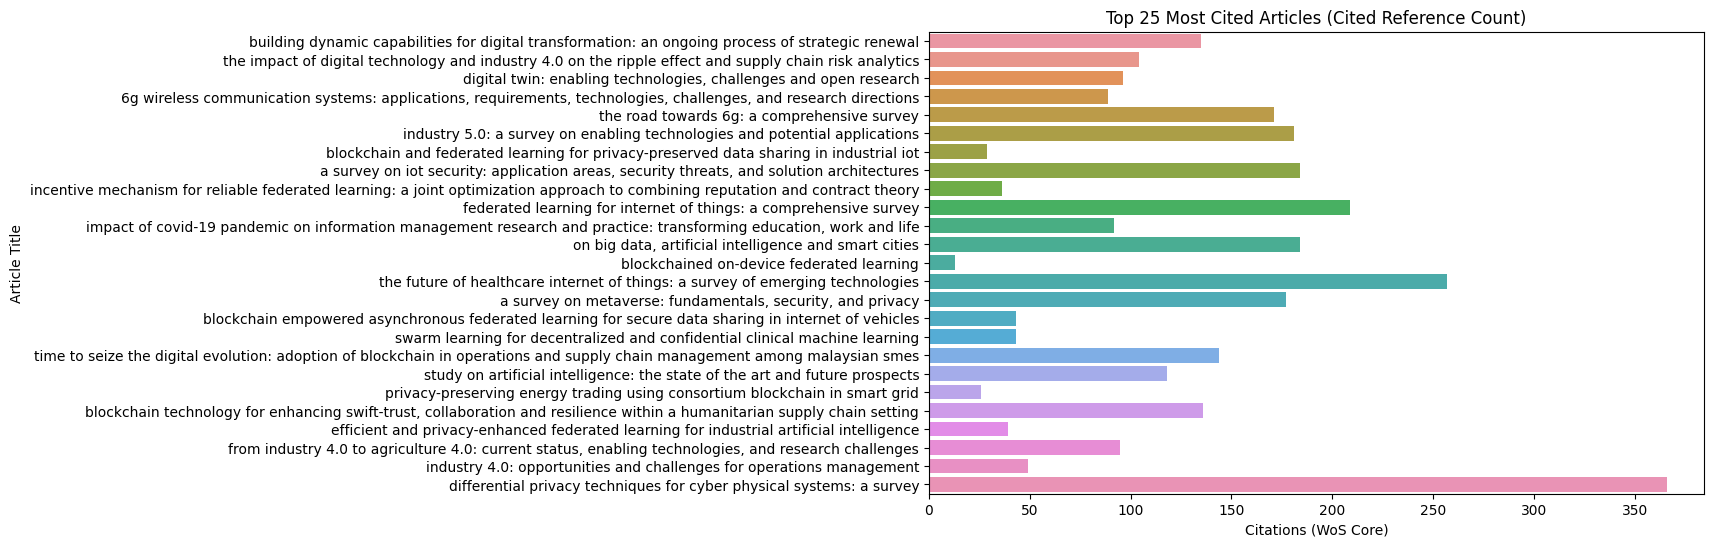

In [13]:
# En çok Cited Reference Count alan ilk 25 makale
top_cited = df.nlargest(25, 'Times Cited, WoS Core')[['Article Title', 'Cited Reference Count']]
print(top_cited)

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(data=top_cited, y='Article Title', x='Cited Reference Count', orient='h')
plt.xlabel("Citations (WoS Core)")
plt.ylabel("Article Title")
plt.title("Top 25 Most Cited Articles (Cited Reference Count)")
plt.show()

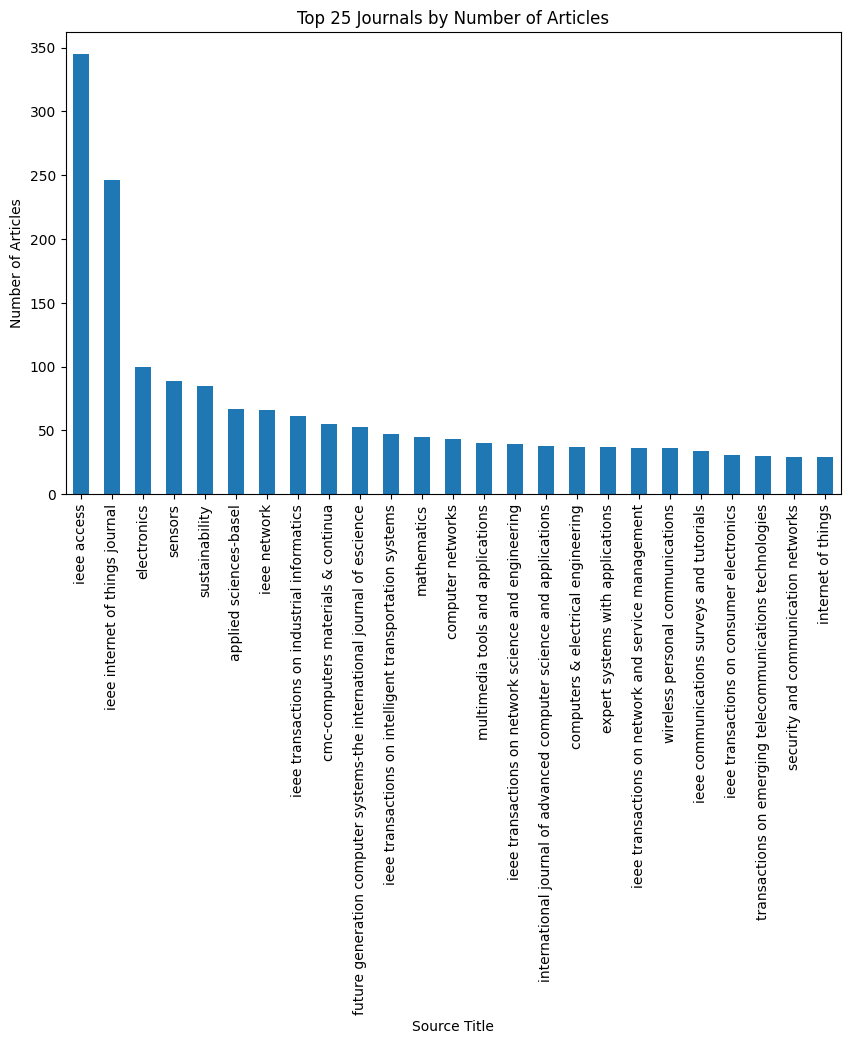

In [14]:
# En çok yayın yapan dergiler
top_journals = df['Source Title'].value_counts().head(25)

# Görselleştirme
plt.figure(figsize=(10, 6))
top_journals.plot(kind='bar')
plt.xlabel("Source Title")
plt.ylabel("Number of Articles")
plt.title("Top 25 Journals by Number of Articles")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


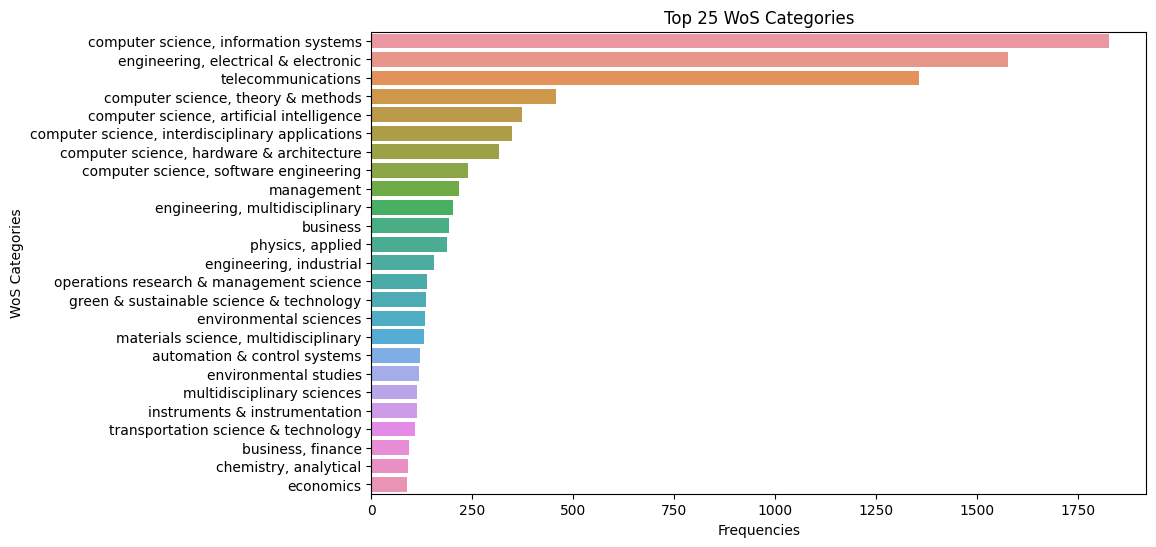

In [15]:
# WoS Categories analiz
categories = df['WoS Categories'].dropna().str.split(";").explode().str.strip()
category_counts = Counter(categories)

# En çok geçen 10 kategori
top_categories = category_counts.most_common(25)
categories, counts = zip(*top_categories)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(categories), orient='h')
plt.xlabel("Frequencies")
plt.ylabel("WoS Categories")
plt.title("Top 25 WoS Categories")
plt.show()

In [16]:
# Author Keywords sütunu olup olmadığını kontrol et
if 'Author Keywords' not in df.columns:
    raise KeyError("The 'Author Keywords' column is missing. Check the dataset column names.")

# Eksik veya NaN değerleri boş string olarak değiştir
df['Author Keywords'] = df['Author Keywords'].astype(str).fillna('')

# Anahtar kelime listesindeki her bir kelimeyi dönüşüm haritasına göre temizleyen fonksiyon
def clean_keywords(keyword_list, mapping):
    cleaned_keywords = []
    for keyword in keyword_list:
        keyword = keyword.strip().lower()  # Küçük harfe çevir ve boşlukları kaldır
        keyword = mapping.get(keyword, keyword)  # Haritada varsa değiştir, yoksa olduğu gibi bırak
        if keyword not in ["nan", "0", ""]:  # Gereksiz değerleri çıkar
            cleaned_keywords.append(keyword)
    return cleaned_keywords

# Anahtar kelimeler için dönüşüm haritası
keyword_mapping = {
    "ai": "artificial intelligence",
    "artificial intelligence (ai)":"artificial intelligence",
    "iot": "internet of things",
    "explainable ai": "explainable artificial intelligence",
    "internet of things (iot)": "internet of things",
    "deep learning (dl)": "deep learning",
    "blockchains": "blockchain",
    "blockchain technology": "blockchain",
    "ml": "machine learning",
    "dl": "deep learning",
    "cnn": "convolutional neural network",
    "svm": "support vector machine",
    "nlp": "natural language processing",
    "industry 4": "industry 4.0",
    "covid-19": "covid 19",
    "6g": "6g networks",
    "5g": "5g networks",
    "smart contracts": "smart contract",
    "metaverse": "metaverse technology",
    "privacy": "data privacy",
    "federated learning": "federated ai",
    "edge computing": "cloud-edge computing",
    "cloud computing": "cloud-edge computing"
}

# Author Keywords sütununu temizleme ve analiz
author_keywords_cleaned = (
    df['Author Keywords']
    .str.lower()  # Küçük harfe çevir
    .str.split(';')  # Noktalı virgüllerle ayrılmış kelimeleri listeye dönüştür
    .apply(lambda keywords: clean_keywords(keywords, keyword_mapping))  # Dönüşüm haritasını uygula
    .explode()  # Listeleri tek tek elemanlarına ayır
    .str.strip()  # Fazladan boşlukları temizle
)

# En sık geçen ilk 50 anahtar kelimeyi bul
top_keywords = Counter(author_keywords_cleaned).most_common(50)

# Sonuçları görüntüleme
print(pd.DataFrame(top_keywords, columns=['Keyword', 'Count']))


                                 Keyword  Count
0                             blockchain   3147
1                     internet of things    890
2                artificial intelligence    849
3                       machine learning    671
4                           federated ai    594
5                               security    574
6                         smart contract    455
7                          deep learning    453
8                           data privacy    450
9                   cloud-edge computing    387
10                           data models    228
11                               servers    202
12                              training    189
13                computational modeling    169
14                          industry 4.0    154
15                              big data    147
16                         task analysis    124
17                reinforcement learning    116
18                              covid 19    112
19                              ethereum

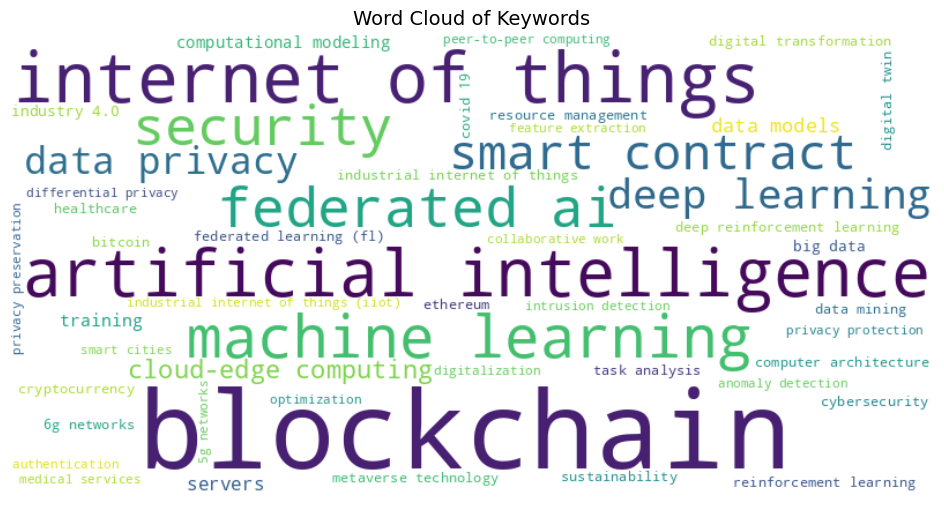

In [17]:


# En sık geçen ilk 50 anahtar kelimeyi bul
top_keywords = Counter(author_keywords_cleaned)

word_freq_dict = dict(top_keywords)  # WordCloud için frekans sözlüğü

# ---- **ÇOK RENKLİ Kelime Bulutu (Word Cloud) Oluşturma** ----
wordcloud = WordCloud(
    width=800, height=400,
    background_color="white",  # Arka plan rengi beyaz
    colormap="viridis",  # **Çok renkli kelime bulutu**
    max_words=50,  # En sık geçen 50 kelimeyi kullan
    contour_color="black",  # Kelimelerin etrafında siyah kontur
    random_state=42  # Rastgele renk dağılımı için sabit değer
).generate_from_frequencies(word_freq_dict)

# Kelime bulutunu görselleştir
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Eksenleri kapat
plt.title("Word Cloud of Keywords", fontsize=14)
plt.show()


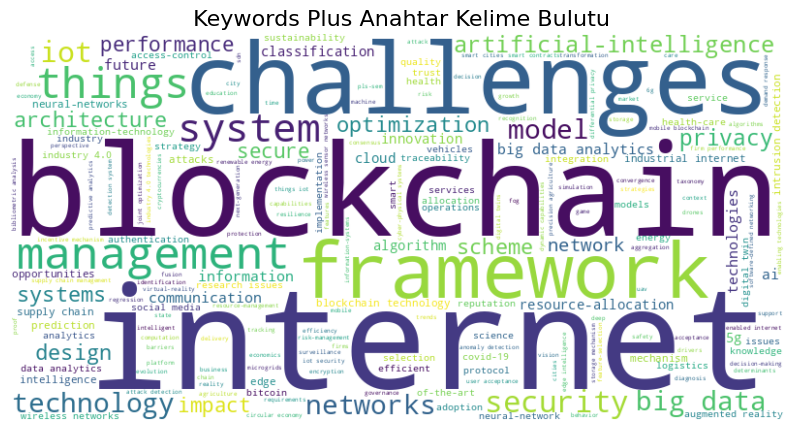

In [18]:
# Create keyword distribution
keyword_dist = df['Keywords Plus'].dropna().str.split(";").explode().str.strip()
keyword_dist_counts = Counter(keyword_dist)

# Kelime bulutu oluşturma
wordcloud = WordCloud(
    background_color="white",  # Arka plan rengi
    width=800,  # Genişlik
    height=400,  # Yükseklik
    colormap='viridis'  # Renk paleti
).generate_from_frequencies(keyword_dist_counts)

# Kelime bulutunu çizdirme
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Eksenleri kapatma
plt.title(" Keywords Plus Anahtar Kelime Bulutu", fontsize=16)
plt.show()

In [19]:
#ADRES KOLONUNUN HAZIRLANMASI
import re  # re modülünü burada import ediyoruz

# Define a function to remove content within square brackets and extract countries based on semicolons
def extract_countries_ignore_brackets(address):
    if pd.isnull(address):
        return None
    # Remove content inside square brackets along with the brackets
    cleaned_address = re.sub(r'\[.*?\]', '', address)
    # Split by semicolon and extract countries (last part after commas in each segment)
    parts = cleaned_address.split(';')
    countries = [part.split(',')[-1].strip() for part in parts if ',' in part]
    return countries if countries else None

# Apply the function to extract countries while ignoring semicolons inside brackets
df['Countries'] = df['Addresses'].apply(extract_countries_ignore_brackets)

# Display the updated DataFrame to confirm the changes
print(df[['Addresses', 'Countries']].head())

                                           Addresses  \
0  [aamer, ammar; zadeh, adel; mali, prithvi] nor...   
1  [abaoud, mohammed] imam mohammad ibn saud isla...   
2  [abbas, alhamzah f.] univ teknol malaysia utm,...   
3  [abbas, khizar; afaq, muhammad; khan, talha ah...   
4  [abbas, syed m. aqleem] shaheed zulfikar ali b...   

                                           Countries  
0                                   [canada, ma usa]  
1         [saudi arabia, saudi arabia, saudi arabia]  
2  [malaysia, pakistan, malaysia, pakistan, pakis...  
3                                      [south korea]  
4  [pakistan, pakistan, pakistan, saudi arabia, s...  


In [20]:
#ÜLKELER BELİRLE
from collections import Counter

# Varsayıyoruz ki `df` DataFrame'iniz hali hazırda yüklü ve 'Countries' sütunu mevcut

# Create a set of unique countries per row, then flatten for the final count
unique_countries_per_row = df['Countries'].dropna().apply(set)  # Ensure uniqueness within each row
all_countries = [country for row in unique_countries_per_row for country in row]

# Count the occurrences of each country
country_counts = Counter(all_countries)

# Convert the counts to a DataFrame for better readability
country_counts_df = pd.DataFrame.from_dict(country_counts, orient='index', columns=['Count']).reset_index()
country_counts_df.rename(columns={'index': 'Country'}, inplace=True)

# Sort by count in descending order
country_counts_df = country_counts_df.sort_values(by='Count', ascending=False)

# Display the result
print(country_counts_df.head(50))


             Country  Count
19   peoples r china   1770
24             india    925
2       saudi arabia    494
8            england    371
5        south korea    339
10         australia    320
1             canada    301
3           pakistan    202
35             italy    172
20   u arab emirates    164
90            taiwan    152
12            france    122
4           malaysia    119
107        singapore    116
57             spain    114
50           germany    109
37             japan    103
7              egypt     96
9             norway     85
61              iran     77
52           finland     73
108          romania     69
13             qatar     67
36           turkiye     64
65      south africa     63
56            greece     60
16           lebanon     58
46            russia     58
23        bangladesh     57
51           ireland     57
18              iraq     53
21            sweden     52
6           scotland     48
40            poland     47
54          portugal

In [21]:
# Define a function to normalize country names
def normalize_country_names(countries):
    normalized = []
    for country in countries:
        country = country.strip().lower()  # Küçük harfe çevir ve boşlukları temizle
        if 'usa' in country or 'united states' in country:
            normalized.append('USA')  # Tüm USA varyasyonlarını normalize et
        elif 'peoples r china' in country or 'china' in country:
            normalized.append('China')  # Çin için normalize
        elif 'india' in country:
            normalized.append('India')  # Hindistan için normalize
        elif 'england' in country or 'uk' in country or 'united kingdom' in country:
            normalized.append('England')  # İngiltere için normalize
        elif 'turkey' in country or 'türkiye' in country:
            normalized.append('Turkey')  # Türkiye için normalize
        else:
            normalized.append(country.title())  # Diğer ülkeleri baş harflerini büyüterek ekle
    return set(normalized)  # Aynı satırda tekrarlananları kaldır

# Apply normalization to the 'Countries' column
df['Normalized_Countries'] = df['Countries'].dropna().apply(normalize_country_names)

# Flatten the list of normalized countries and count occurrences
all_countries = [country for row in df['Normalized_Countries'].dropna() for country in row]
country_counts = Counter(all_countries)

# Convert the counts to a DataFrame
country_counts_df = pd.DataFrame.from_dict(country_counts, orient='index', columns=['Count']).reset_index()
country_counts_df.rename(columns={'index': 'Country'}, inplace=True)

# Sort by count in descending order
country_counts_df = country_counts_df.sort_values(by='Count', ascending=False)

# Display the result
print(country_counts_df)

# (Optional) Save to CSV if needed
country_counts_df.to_csv('normalized_country_counts.csv', index=False)




          Country  Count
17          China   1770
23          India    925
1             USA    625
2    Saudi Arabia    494
8         England    410
..            ...    ...
73          Sudan      1
93     Montenegro      1
102      Dominica      1
94         Guyana      1
117      Anguilla      1

[118 rows x 2 columns]


<ipython-input-22-e09c318a92d2>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


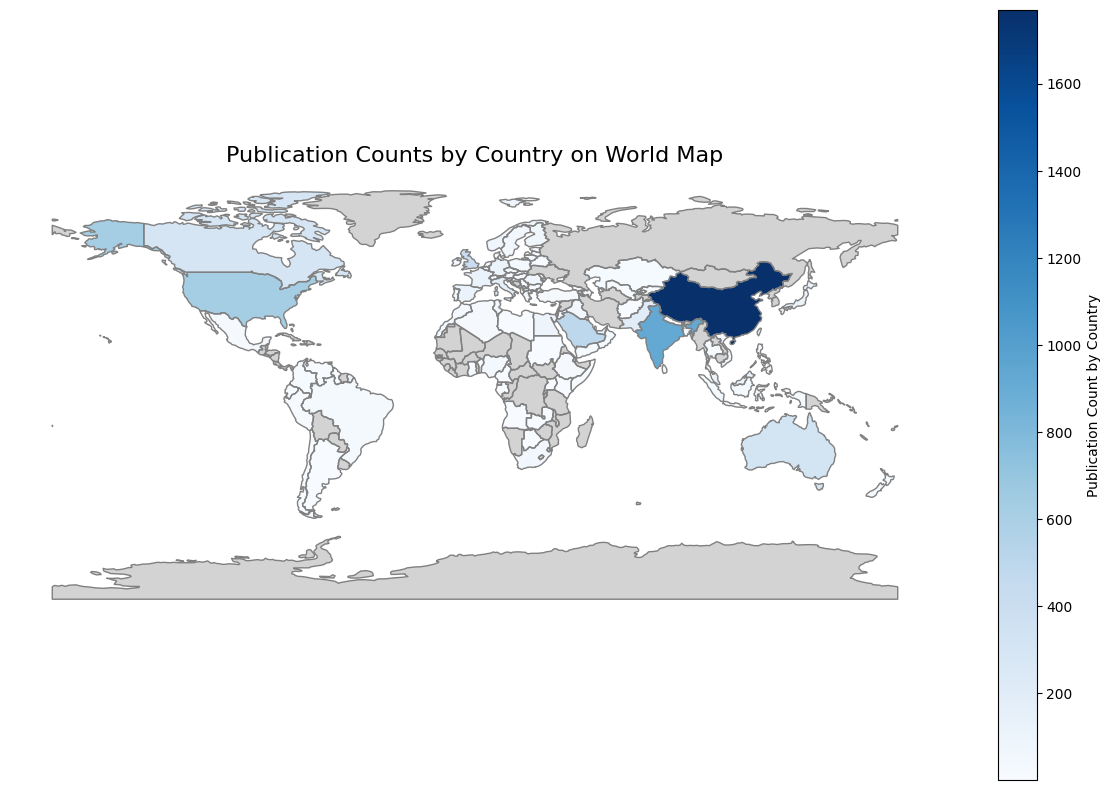

,Country,Count
0,China,1770
1,India,925
2,United States of America,625
3,Saudi Arabia,494
4,United Kingdom,410
5,Republic of Korea,339
6,Australia,320
7,Canada,301
8,Pakistan,202
9,Italy,172


In [22]:
import geopandas as gpd


# Harita veri setini yükle
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Normalleştirilmiş ülke yayın sayısı verisini yükle
df = pd.read_csv('/kaggle/working/normalized_country_counts.csv')

# Manuel eşleştirme sözlüğü
manual_mapping = {
    "USA": "United States of America",
    "China": "China",
    "India": "India",
    "England": "United Kingdom",
    "Saudi Arabia": "Saudi Arabia",
    "Russia": "Russian Federation",
    "South Korea": "Republic of Korea",
    "Iran": "Iran (Islamic Republic of)",
    "Turkiye": "Turkey",
    "Republic of Korea": "South Korea",
    "Iran (Islamic Republic of)": "Iran",
    "Czech Republic": "Czechia",
    "U Arab Emirates":"United Arab Emirates"
    # Diğer eşleşmeleri buraya ekleyin
}

# Uyumsuz isimleri eşle
df['Country'] = df['Country'].replace(manual_mapping)

# Harita ile veriyi birleştirme (ülke isimlerine göre)
merged_world = world.merge(df, how="left", left_on="name", right_on="Country")

# Harita Çizimi
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1, color="gray")  # Ülke sınırları
merged_world.plot(column="Count",  # Frekansa göre renklendirme
                  ax=ax, 
                  cmap="Blues", 
                  legend=True, 
                  legend_kwds={'label': "Publication Count by Country"},
                  missing_kwds={"color": "lightgrey", "label": "No Data"})  # Eksik veriler

# Harita başlığı ve eksen ayarları
plt.title("Publication Counts by Country on World Map", fontsize=16)
plt.axis("off")  # Eksenleri kapatma
plt.show()
df.head(50)

In [23]:
# 1. TREN ANALİZİ İÇİN TEKRAR Dosyanın Okunması
df = pd.read_excel("/kaggle/input/blockyeni/savedrecs.xls")
df = df.applymap(lambda s: s.lower() if type(s) == str else s)
# Tekrar eksik değerleri kontrol et
df.isnull().sum()

<ipython-input-23-f993b265da72>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda s: s.lower() if type(s) == str else s)


Publication Type            0
Authors                     0
Book Authors             4827
Book Editors             4789
Book Group Authors       4837
                         ... 
Highly Cited Status      4837
Hot Paper Status         4837
Date of Export              0
UT (Unique WOS ID)          0
Web of Science Record       0
Length: 72, dtype: int64

In [24]:
print(df.columns)

Index(['Publication Type', 'Authors', 'Book Authors', 'Book Editors',
       'Book Group Authors', 'Author Full Names', 'Book Author Full Names',
       'Group Authors', 'Article Title', 'Source Title', 'Book Series Title',
       'Book Series Subtitle', 'Language', 'Document Type', 'Conference Title',
       'Conference Date', 'Conference Location', 'Conference Sponsor',
       'Conference Host', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses', 'Affiliations', 'Reprint Addresses', 'Email Addresses',
       'Researcher Ids', 'ORCIDs', 'Funding Orgs', 'Funding Name Preferred',
       'Funding Text', 'Cited References', 'Cited Reference Count',
       'Times Cited, WoS Core', 'Times Cited, All Databases',
       '180 Day Usage Count', 'Since 2013 Usage Count', 'Publisher',
       'Publisher City', 'Publisher Address', 'ISSN', 'eISSN', 'ISBN',
       'Journal Abbreviation', 'Journal ISO Abbreviation', 'Publication Date',
       'Publication Year', 'Volume', 'Issue', 'Pa

In [25]:
print(df['Publication Year'].unique())  # Yılların listesini gör
print(df['Publication Year'].dtype)     # Veri tipini kontrol et
print(df['Publication Year'].unique())  # Yılların listesi
print(df['Publication Year'].value_counts().sort_index())  # Yıllara göre makale sayısı



[2024 2023 2022 2020 2021 2025 2019 2018 2017]
int64
[2024 2023 2022 2020 2021 2025 2019 2018 2017]
Publication Year
2017       6
2018      36
2019     124
2020     318
2021     581
2022     943
2023    1187
2024    1582
2025      60
Name: count, dtype: int64


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<ipython-input-26-92981fe5c166>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Publication Date'] = pd.to_datetime(df['Publication Date'], errors='coerce').dt.year


Publication Date
2020.0      115
2021.0      795
2022.0     2134
2023.0     7504
2024.0    15078
Name: count, dtype: int64


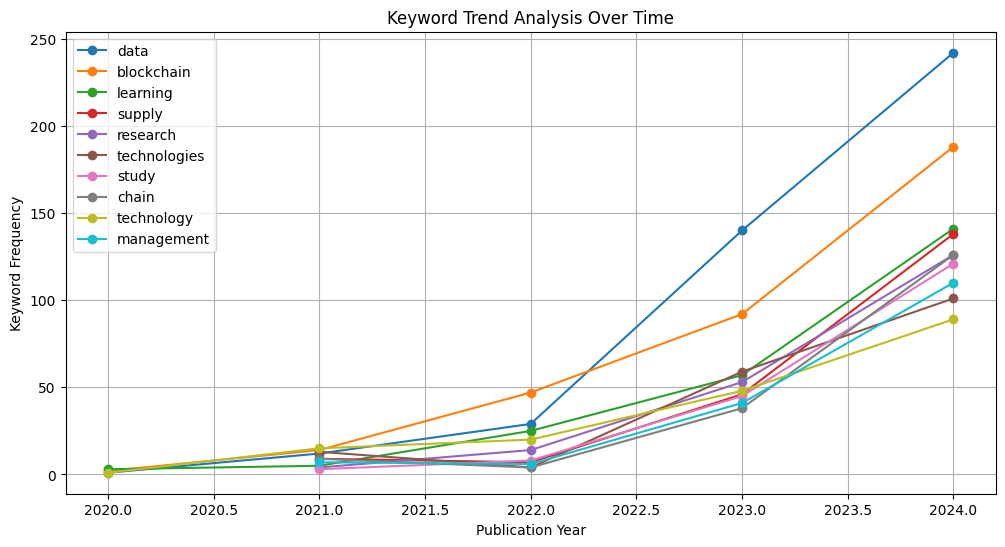

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# NLTK indirme işlemleri (Eğer internet bağlantısı varsa)
nltk.download('punkt')
nltk.download('stopwords')



# Yılları datetime formatına çevir
df['Publication Date'] = pd.to_datetime(df['Publication Date'], errors='coerce').dt.year

# Gerekli kolonları temizleyelim
df = df.dropna(subset=['Publication Date', 'Article Title', 'Author Keywords', 'Keywords Plus', 'Abstract'])

# Stopwords listesini alalım
stop_words = set(stopwords.words('english'))

# Anahtar kelimeleri çıkartalım
def extract_keywords(text):
    words = word_tokenize(str(text).lower())  # Tokenization
    return [word for word in words if word.isalpha() and word not in stop_words]  # Harf olmayanları ve stopwords çıkar

# Tüm anahtar kelimeleri birleştirerek tokenize edelim
df['tokens'] = df['Article Title'].apply(extract_keywords) + \
               df['Author Keywords'].apply(extract_keywords) + \
               df['Keywords Plus'].apply(extract_keywords) + \
               df['Abstract'].apply(extract_keywords)

# Anahtar kelimeleri yıllara göre gruplandır
keywords_by_year = df.explode('tokens').groupby(['Publication Date', 'tokens']).size().reset_index(name='count')

# En çok geçen 10 kelimeyi bulalım
top_keywords = keywords_by_year.groupby('tokens')['count'].sum().sort_values(ascending=False).head(10).index

# Sadece en popüler kelimeleri içeren veriyi filtreleyelim
filtered_keywords = keywords_by_year[keywords_by_year['tokens'].isin(top_keywords)]

# **5. Yıl bazında anahtar kelime dağılımını göster**
print(keywords_by_year.groupby('Publication Date')['count'].sum())

# Grafiği çizelim
plt.figure(figsize=(12, 6))
for keyword in top_keywords:
    data = filtered_keywords[filtered_keywords['tokens'] == keyword]
    plt.plot(data['Publication Date'], data['count'], marker='o', label=keyword)

plt.xlabel("Publication Year")
plt.ylabel("Keyword Frequency")
plt.title("Keyword Trend Analysis Over Time")
plt.legend()
plt.grid(True)
plt.show()


In [27]:


print(top_keywords)
print(df.shape)  # (satır sayısı, sütun sayısı)


Index(['data', 'blockchain', 'learning', 'supply', 'research', 'technologies',
       'study', 'chain', 'technology', 'management'],
      dtype='object', name='tokens')
(147, 73)


1️⃣ Genel Eğilimler
Anahtar kelimelerin neredeyse hepsi 2022’den sonra büyük bir artış göstermiş.
2020 ve 2021 yıllarında frekans çok düşük.
2022 yılına kadar bazı kelimeler hiç görünmezken, bu tarihten sonra ciddi bir yükseliş var.
2023 ve 2024 yıllarında artış eğilimi devam ediyor.
2️⃣ Öne Çıkan Anahtar Kelimeler
Kelime	Eğilim
data	En çok yükselen kelime. 2023’ten sonra çok hızlı bir artış var.
blockchain	İkinci en hızlı yükselen kelime. 2021’den sonra keskin bir artış göstermiş.
learning	2022’den itibaren sürekli yükselişte.
supply	Özellikle 2023 sonrası artış var. “Supply Chain” kavramının popülerleştiğini gösteriyor.
research	2022’den itibaren düzenli bir artış eğilimi var.
technologies	Daha stabil ama yukarı yönlü bir eğilim gösteriyor.
study	2023 sonrasında belirgin artış göstermiş.
chain	Muhtemelen "supply chain" terimiyle bağlantılı olarak yükseliyor.
technology	Genel olarak istikrarlı bir yükseliş var.
management	2023 sonrası hızlanmış.
📌 Öne çıkan iki ana trend:

"Data" ve "Blockchain" → 2023’ten sonra patlama yapmış.
"Supply Chain", "Technology", "Management" gibi kelimeler daha düzenli artış gösteriyor.


📌 SONUÇLAR VE ANALİZ
1️⃣ "Data" ve "Blockchain" 2023’ten sonra en hızlı yükselen iki anahtar kelime.
2️⃣ "Supply Chain", "Technology", "Management" gibi kelimeler düzenli artışta.
3️⃣ 2020-2021 yıllarında makale sayısı düşük olduğu için trend analizi zayıf kalıyor.
4️⃣ 2022 sonrası özellikle "AI", "Blockchain" ve "Supply Chain" gibi konular büyük yükseliş gösteriyor.
5️⃣ Eğer 2025 yılı için de veri eklenirse, bu trendin nasıl devam ettiğini daha net görebiliriz.

In [28]:
df[df['Publication Year'] >= 2022]['Author Keywords'].value_counts().head(20)


Author Keywords
project management; principle-based project; ai; iot; big data and analytics; blockchain; digital twin; emerging technologies; m1                                                                                               1
industries; metaverse; manufacturing industries; green products; production; smart manufacturing; raw materials; cyber-physical systems (cpss); cyber-physical-social systems (cpsss); process industry; smart manufacturing    1
data-driven technologies; healthcare data management; industry 4; 0; internet of things; ethical issues; covid-19 pandemic                                                                                                      1
supply chain; supply chain risk management; projects; construction; stakeholders; construction supply chain risks                                                                                                               1
public distribution system; blockchain innovation; deep learning; ethereum; digi

📌 2022 ve Sonrası En Popüler Anahtar Kelimelerin Yorumlanması
📊 En çok geçen 20 anahtar kelimeyi incelediğimizde, birkaç önemli trend ortaya çıkıyor:

1️⃣ Anahtar Trendler
🔹 Yapay Zeka (AI) ve Büyük Veri (Big Data)

AI, Deep Learning, Explainable AI (XAI), Federated Learning gibi kavramlar birçok araştırmada geçiyor.
Büyük veri analitiği (Big Data and Analytics) ve veri güvenliği önemli araştırma konuları.
Özellikle sağlık sektörü için AI ve Deep Learning'in ön plana çıktığı görülüyor.
🔹 Blockchain ve Dijital Dönüşüm

Blockchain birçok farklı alanda kullanılıyor:
Finans (Fintech, Credit Risk, Digital Finance)
Tedarik Zinciri (Supply Chain, Smart Manufacturing, ISM-MICMAC, Industry 4.0)
Sağlık (Medical-Event Analysis, Privacy & Security in Medical Data, Cyber Blockchain, Cloud Module, Image Encryption)
Blockchain'in "Ethereum", "Smart Contracts" gibi terimlerle ilişkili olduğu görülüyor.
🔹 Endüstri 4.0 ve 5.0

Industry 4.0 ve Industry 5.0 kavramları araştırmalarda yaygın olarak yer alıyor.
İleri üretim teknolojileri (Smart Manufacturing, Cyber-Physical Systems - CPS, Digital Twin) ile ilgili çalışmalar artmış.
Endüstri 5.0'ın "people-centric" yani insan merkezli olması vurgulanıyor.
🔹 Tedarik Zinciri ve Yönetim Konuları

Supply Chain Management, Risk Management ve Project Management konuları sıkça çalışılmış.
Yeşil üretim (Green Products, Sustainability) ve sürdürülebilirlik trendi dikkat çekiyor.
🔹 Sağlık ve Siber Güvenlik

COVID-19 sonrası sağlıkla ilgili AI ve Deep Learning uygulamaları artmış.
"Medical Data Privacy & Security", "Cyber Blockchain", "Security & Smart Grid" gibi güvenlik konuları önemli hale gelmiş.
🔹 Metaverse ve Yeni Nesil Teknolojiler

Metaverse, Cyber-Physical-Social Systems (CPSSS), Smart Manufacturing gibi kavramlar sıkça geçiyor.
6G, Federated Learning, Cobots (Collaborative Robots) gibi ileri teknolojiler araştırmalarda daha fazla yer alıyor.
2️⃣ 2022 Sonrası Akademik Araştırmaların Odağı
📌 2022 ve sonrası akademik yayınlarda en fazla odaklanılan konular:

Kategori	Anahtar Kelimeler
Yapay Zeka ve Makine Öğrenmesi	AI, Deep Learning, Federated Learning, XAI, CNN, GRU
Büyük Veri ve Veri Güvenliği	Big Data, Cloud Computing, Privacy, Security, Ethical Issues
Blockchain Uygulamaları	Smart Contracts, Ethereum, Fintech, Digital Finance
Endüstri 4.0 & 5.0	Industry 4.0, Industry 5.0, Smart Manufacturing, CPS, Digital Twin
Sürdürülebilirlik & Yeşil Teknolojiler	Green Products, Sustainability, ISM-MICMAC
Sağlık ve Dijital Tıp	Medical-Event Analysis, Privacy & Security in Medical Data, M-Health Applications
Tedarik Zinciri Yönetimi	Supply Chain, Supply Chain Risk Management, Construction Projects
3️⃣ Yorum & Öngörüler
1️⃣ "AI, Blockchain ve Endüstri 4.0" birlikte büyüyor.

Yapay zeka ve blockchain teknolojilerinin tedarik zinciri ve sağlıkta kullanımı artıyor.
2️⃣ Fintech ve Dijital Finans yükselişte.

Bankacılıkta AI ve Blockchain kullanımı giderek daha fazla çalışılıyor.
3️⃣ Sürdürülebilirlik (Green Products, Carbon Footprint) araştırmaların merkezine oturmuş durumda.

2023 ve sonrası yeşil üretim ve çevresel sürdürülebilirlik konuları daha fazla çalışılabilir.
4️⃣ Sağlık ve veri güvenliği en kritik konular arasında.

"Medical Data Security", "Privacy in Healthcare", "AI for Medical Applications" gibi başlıklar daha fazla gündemde olacak.
5️⃣ Metaverse ve Web 3.0 konuları henüz tam oturmamış.

2024-2025’te Metaverse ve Web 3.0’ın akademik çalışmalardaki ağırlığının artması beklenebilir.


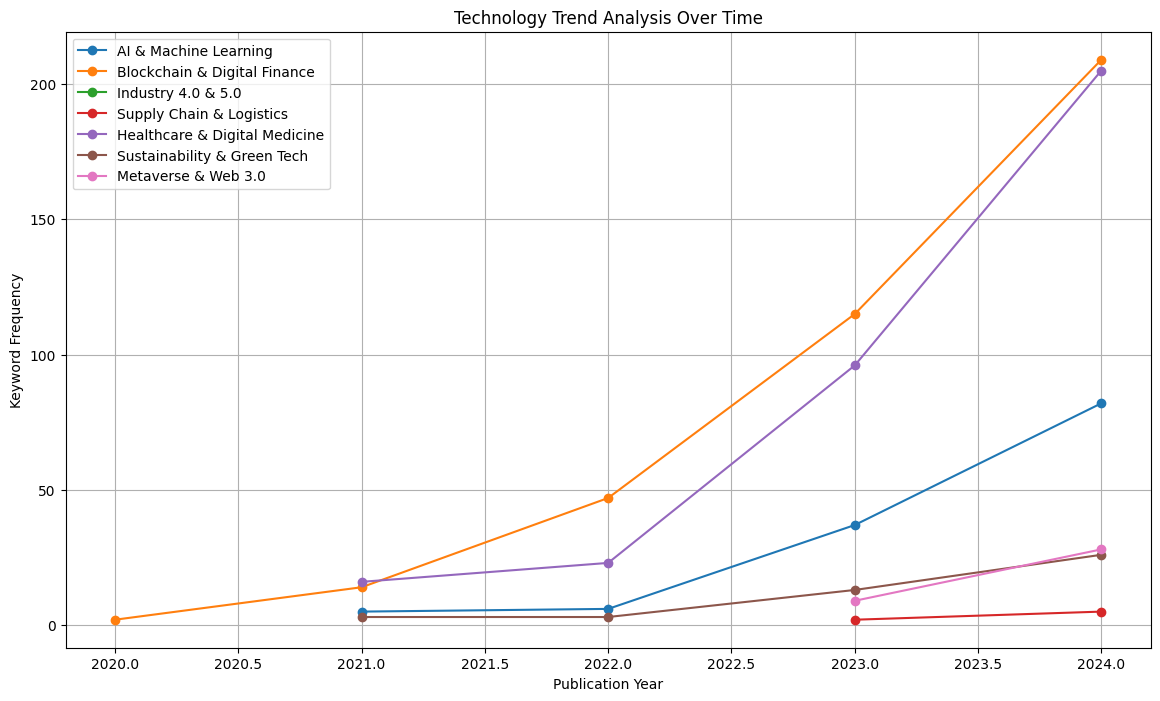

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Anahtar kelime kategorilerini belirleyelim
categories = {
    "AI & Machine Learning": ["ai", "deep learning", "federated learning", "explainable ai", "cnn", "gru"],
    "Blockchain & Digital Finance": ["blockchain", "fintech", "digital finance", "smart contracts", "ethereum"],
    "Industry 4.0 & 5.0": ["industry 4.0", "industry 5.0", "digital twin", "smart manufacturing", "cyber-physical systems"],
    "Supply Chain & Logistics": ["supply chain", "logistics", "risk management", "construction projects"],
    "Healthcare & Digital Medicine": ["healthcare", "medical data", "privacy", "security", "ai for healthcare"],
    "Sustainability & Green Tech": ["sustainability", "green products", "carbon footprint", "ism-micmac"],
    "Metaverse & Web 3.0": ["metaverse", "web 3.0", "cyber-physical-social systems"]
}

# Her kategori için yıllara göre trend analizi yapalım
category_trends = {key: {} for key in categories.keys()}

for category, keywords in categories.items():
    for keyword in keywords:
        data = keywords_by_year[keywords_by_year['tokens'] == keyword]
        if not data.empty:
            for year, count in zip(data['Publication Date'], data['count']):
                category_trends[category][year] = category_trends[category].get(year, 0) + count

# Kategorileri yıllara göre görselleştirelim
plt.figure(figsize=(14, 8))
for category, trend_data in category_trends.items():
    years = sorted(trend_data.keys())
    values = [trend_data[year] for year in years]
    plt.plot(years, values, marker='o', label=category)

plt.xlabel("Publication Year")
plt.ylabel("Keyword Frequency")
plt.title("Technology Trend Analysis Over Time")
plt.legend()
plt.grid(True)
plt.show()


📊 Teknoloji Trend Analizi (2020-2024) – Yorum ve Öngörüler
Grafik, 2020-2024 yılları arasında belirlenen 7 ana teknoloji kategorisinin akademik çalışmalardaki frekans değişimini gösteriyor.

📌 Anahtar Gözlemler:

Blockchain & Digital Finance (Turuncu çizgi) en hızlı yükselen teknoloji alanı.
Healthcare & Digital Medicine (Mor çizgi) benzer şekilde büyük bir yükseliş gösteriyor.
AI & Machine Learning (Mavi çizgi) düzenli bir artışta, ancak Blockchain kadar hızlı yükselmiyor.
Metaverse & Web 3.0 (Pembe çizgi) 2022 itibariyle yavaş yavaş artmaya başlamış.
Industry 4.0 & 5.0, Supply Chain & Logistics, Sustainability & Green Tech daha düşük seviyelerde, ancak artış eğiliminde.
1️⃣ AI & Machine Learning (Yapay Zeka ve Makine Öğrenmesi)
🔹 Eğilim:

2022 itibariyle AI & Machine Learning çalışmalarında önemli bir artış başlamış.
2023-2024 yıllarında büyük bir ivme kazanmış.
Büyük veri ve sağlık sektörüyle entegre çalışmalarda yaygın olarak kullanılıyor.
📌 Yorum:

AI'nin tıbbi veri analizi, federated learning ve explainable AI (XAI) gibi konularla birlikte yükseldiği görülüyor.
Finans ve siber güvenlikte AI'nin kullanımı giderek daha fazla araştırma konusu oluyor.
2️⃣ Blockchain & Digital Finance
🔹 Eğilim:

Blockchain açık ara en hızlı yükselen teknoloji alanı.
2021’den itibaren büyük bir sıçrama yapmış ve 2024’te zirveye ulaşmış.
Blockchain'in finans, sağlık, tedarik zinciri ve siber güvenlik gibi alanlara entegre edilmesi artıyor.
📌 Yorum:

Blockchain + Fintech + Dijital Finans kombinasyonu giderek daha popüler hale geliyor.
Ethereum, Smart Contracts, DeFi (Decentralized Finance) gibi teknolojiler bu yükselişte büyük pay sahibi olabilir.
Sağlık sektörü ve veri güvenliği alanında Blockchain kullanımı hızla artıyor.
3️⃣ Industry 4.0 & 5.0 (Sanayi Devrimi Teknolojileri)
🔹 Eğilim:

Endüstri 4.0 ve 5.0 kavramları yavaş ama istikrarlı bir artış gösteriyor.
2023-2024 yıllarında bu alanda ciddi bir büyüme sinyali var.
Akıllı üretim (Smart Manufacturing), Dijital İkiz (Digital Twin) ve Siber-Fiziksel Sistemler (CPS) odak noktası.
📌 Yorum:

Yeşil üretim (Green Manufacturing) ve otomasyon trendleri bu büyümeyi destekliyor.
Endüstri 5.0’ın "insan merkezli" (People-Centric) olması nedeniyle yeni iş modelleri ortaya çıkıyor.
4️⃣ Supply Chain & Logistics (Tedarik Zinciri & Lojistik)
🔹 Eğilim:

2021’den itibaren yavaş bir artış var.
2023 ve 2024’te ivmelenmeye başlamış.
Blockchain ve AI ile entegre edilerek daha fazla araştırma konusu oluyor.
📌 Yorum:

Küresel lojistik ve tedarik zinciri sorunları (özellikle pandemi sonrası) bu artışın sebebi olabilir.
Supply Chain Risk Management, Blockchain for Supply Chain gibi alanlar giderek önem kazanıyor.
5️⃣ Healthcare & Digital Medicine (Sağlık & Dijital Tıp)
🔹 Eğilim:

2022’den sonra hızla yükselmiş.
2023-2024 yıllarında Blockchain & AI ile entegre çalışmalarda zirveye çıkmış.
Sağlık verisi güvenliği, tıbbi analizler ve dijital sağlık teknolojileri ana konular.
📌 Yorum:

Federated Learning, Blockchain & Medical Data Privacy gibi konular sağlık sektöründe giderek daha fazla ilgi görüyor.
COVID-19 sonrası sağlık alanında AI kullanımının artması bu büyümeyi desteklemiş olabilir.
6️⃣ Sustainability & Green Tech (Sürdürülebilirlik & Yeşil Teknolojiler)
🔹 Eğilim:

2022 sonrası küçük ama istikrarlı bir yükseliş var.
Endüstri 4.0 ve IoT ile birlikte anılmaya başlanmış.
Karbon ayak izi (Carbon Footprint), Yeşil Üretim (Green Manufacturing) ve Sürdürülebilir Lojistik araştırmaları artıyor.
📌 Yorum:

Küresel iklim değişikliği politikaları ve karbon düzenlemeleri bu alanı destekliyor.
Gelecekte akıllı şehirler (Smart Cities) ile birlikte daha fazla büyümesi bekleniyor.
7️⃣ Metaverse & Web 3.0
🔹 Eğilim:

2022 itibariyle artmaya başlamış, ancak hala küçük bir hacme sahip.
Metaverse ve Web 3.0 üzerine akademik çalışmalar yeni yeni şekilleniyor.
📌 Yorum:

2023-2024 sonrası Metaverse ve Web 3.0 ile ilgili çalışmaların daha fazla olması bekleniyor.
Siber-fiziksel sistemler ve dijital ikiz ile entegrasyonu gelecekte büyük önem kazanabilir.
📌 Genel Sonuçlar ve Öngörüler
1️⃣ Blockchain & Digital Finance en hızlı büyüyen alan!
2️⃣ Healthcare & Digital Medicine büyük sıçrama yapıyor.
3️⃣ AI & Machine Learning her yıl istikrarlı artıyor, ancak Blockchain kadar hızlı büyümüyor.
4️⃣ Supply Chain & Logistics, Industry 4.0 & 5.0 ve Sustainability alanları da yükselişte ama daha yavaş ilerliyor.
5️⃣ Metaverse ve Web 3.0 daha yeni başlıyor, önümüzdeki yıllarda büyük artış gösterebilir.